In [1]:
import pandas as pd

In [29]:
customer = pd.read_csv('customer.csv', sep=';')
transaction = pd.read_csv('transaction.csv', sep=';')

In [6]:
customer

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,1961-10-03,NaN,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,1975-08-09,VP Product Management,Health,Mass Customer,N,No,57042 Village Green Point,4511,QLD,Australia,6
3996,3997,Blanch,Nisuis,Female,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,3998,Sarene,Woolley,U,NaN,Assistant Manager,IT,High Net Worth,N,No,8194 Lien Street,4032,QLD,Australia,7
3998,3999,Patrizius,NaN,Male,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,320 Acker Drive,2251,NSW,Australia,7


In [10]:
transaction


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
0,1,2,2950,25.02.2017,False,Approved,Solex,Standard,medium,medium,"71,49","53,62"
1,2,3,3120,21.05.2017,True,Approved,Trek Bicycles,Standard,medium,large,"2091,47","388,92"
2,3,37,402,16.10.2017,False,Approved,OHM Cycles,Standard,low,medium,"1793,43","248,82"
3,4,88,3135,31.08.2017,False,Approved,Norco Bicycles,Standard,medium,medium,"1198,46","381,10"
4,5,78,787,01.10.2017,True,Approved,Giant Bicycles,Standard,medium,large,"1765,3","709,48"
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,51,1018,24.06.2017,True,Approved,OHM Cycles,Standard,high,medium,"2005,66","1203,40"
19996,19997,41,127,09.11.2017,True,Approved,Solex,Road,medium,medium,"416,98","312,74"
19997,19998,87,2284,14.04.2017,True,Approved,OHM Cycles,Standard,medium,medium,"1636,9","44,71"
19998,19999,6,2764,03.07.2017,False,Approved,OHM Cycles,Standard,high,medium,"227,88","136,73"


(1 балл) Вывести все уникальные бренды, у которых стандартная стоимость выше 1500 долларов.


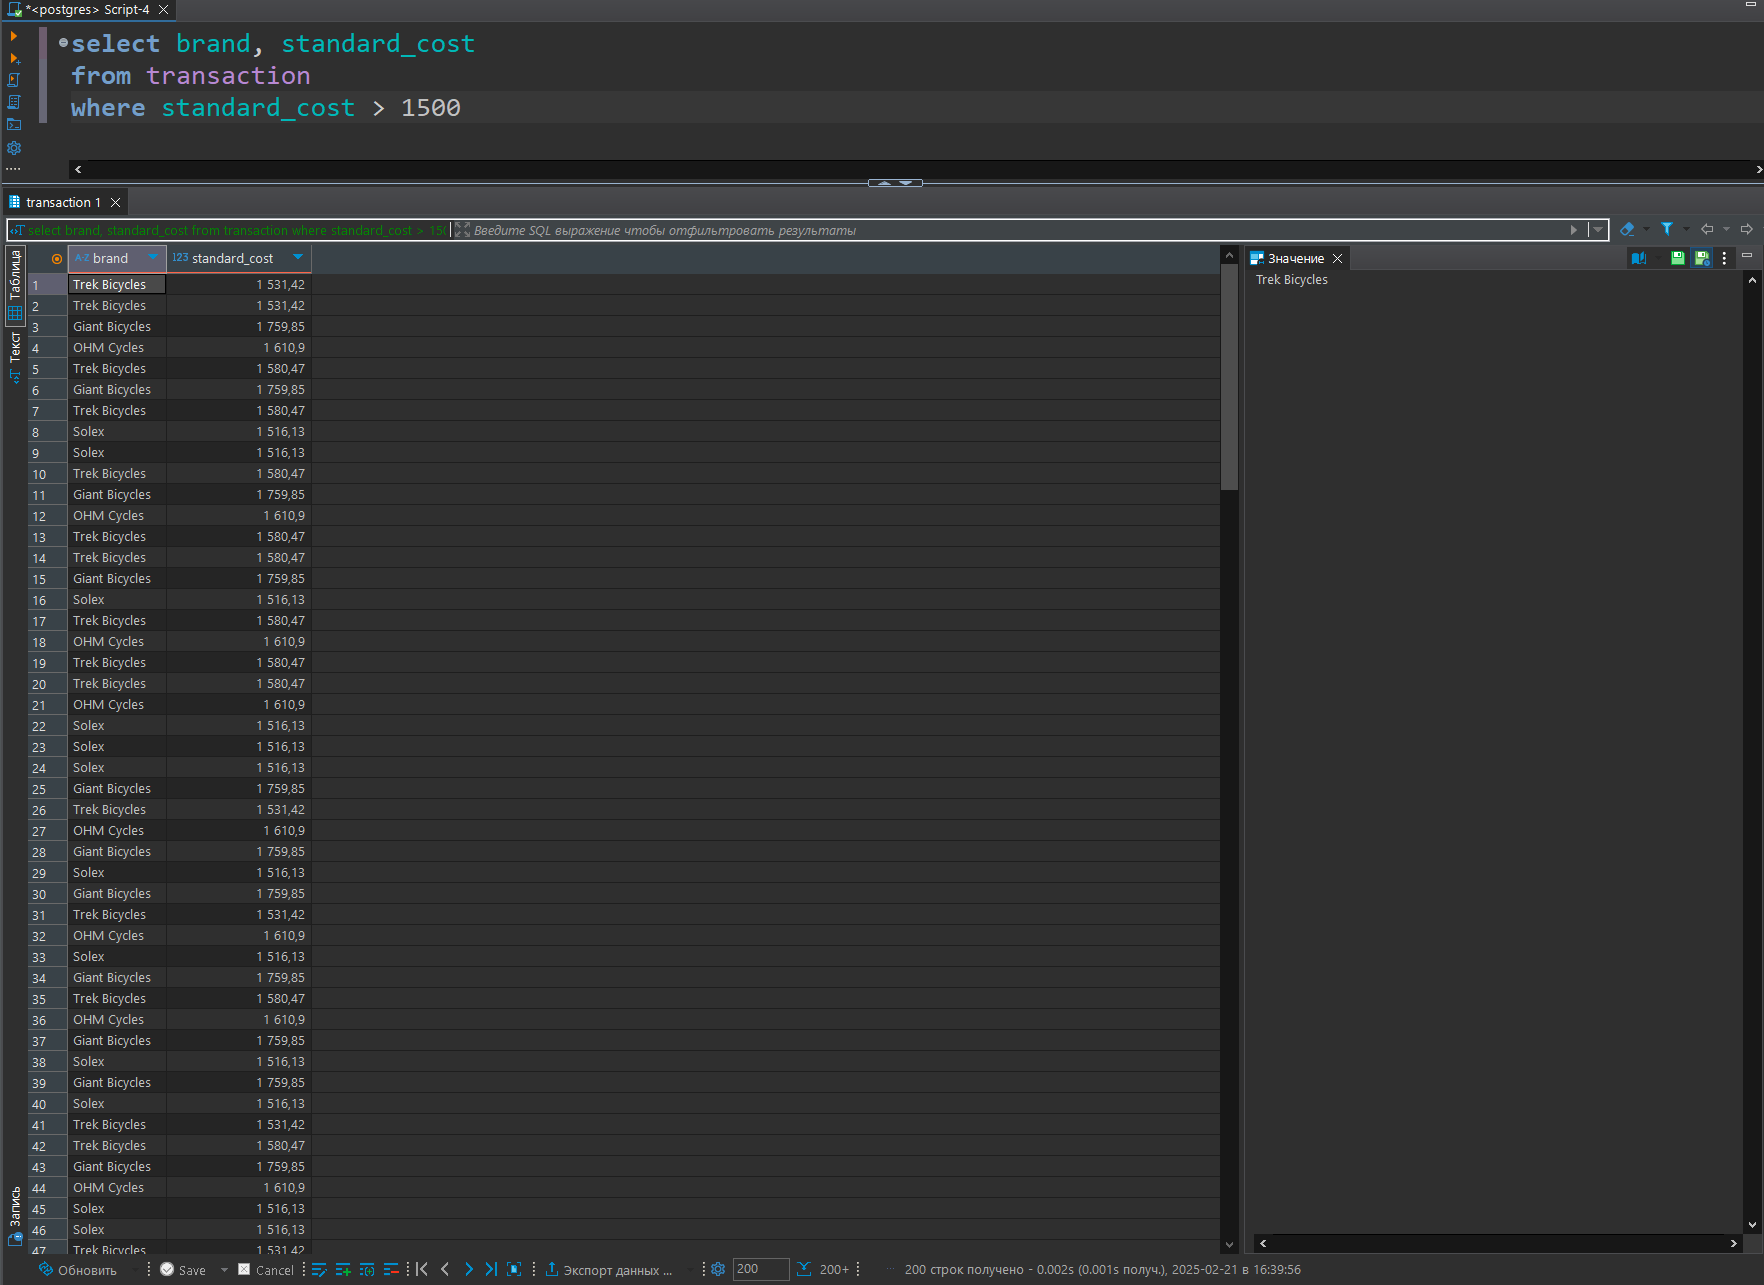

In [117]:
# изначально плохое решение держать колонку со стоимостью в типе object
# поэтому заменим запятую на точку, чтобы можно было преобразовать в float
transaction['standard_cost'] = transaction['standard_cost'].str.replace(',', '.').astype(float)

# предполагаем, что изначально стоимость находится в долларах,
# т.к. иного не указано
transaction[["brand", "standard_cost"]].loc[transaction['standard_cost'].astype(float) > 1500]

,brand,standard_cost
33,Trek Bicycles,1531.42
55,Trek Bicycles,1531.42
59,Giant Bicycles,1759.85
116,OHM Cycles,1610.90
117,Trek Bicycles,1580.47
...,...,...
19893,Solex,1516.13
19947,OHM Cycles,1610.90
19960,OHM Cycles,1610.90
19981,Solex,1516.13


(1 балл) Вывести все подтвержденные транзакции за период '2017-04-01' по '2017-04-09' включительно.

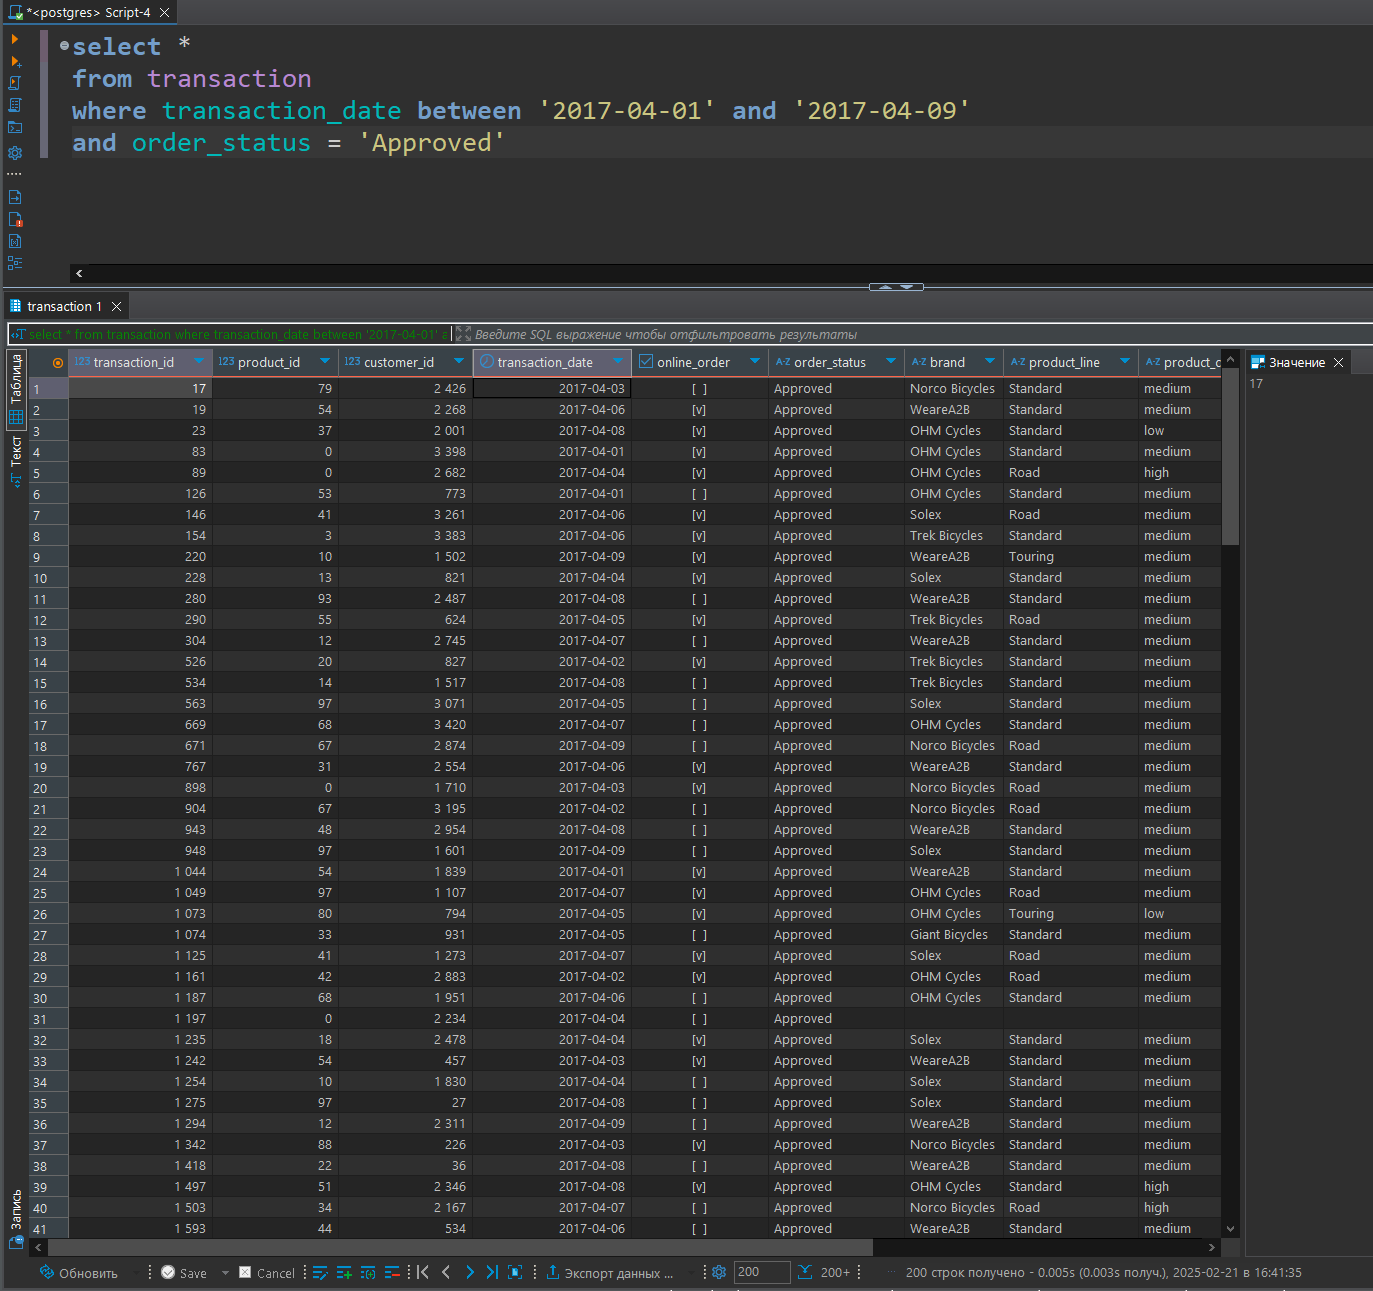

In [118]:
# все object преобразуем в нужный формат
transaction['transaction_date'] = pd.to_datetime(transaction['transaction_date'], format='%d.%m.%Y')

In [50]:
transaction[(transaction["transaction_date"] >= "2017-04-01") &
            (transaction["transaction_date"] <= "2017-04-09") &
            (transaction["order_status"] == "Approved")]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
16,17,79,2426,2017-04-03,False,Approved,Norco Bicycles,Standard,medium,medium,"1555,58",818.01
18,19,54,2268,2017-04-06,True,Approved,WeareA2B,Standard,medium,medium,"1292,84",13.44
22,23,37,2001,2017-04-08,True,Approved,OHM Cycles,Standard,low,medium,"1793,43",248.82
82,83,0,3398,2017-04-01,True,Approved,OHM Cycles,Standard,medium,medium,"235,63",125.07
88,89,0,2682,2017-04-04,True,Approved,OHM Cycles,Road,high,large,"12,01",7.21
...,...,...,...,...,...,...,...,...,...,...,...,...
19654,19655,0,336,2017-04-09,True,Approved,Norco Bicycles,Standard,medium,medium,"360,4",270.30
19852,19853,7,3072,2017-04-02,False,Approved,Trek Bicycles,Road,low,medium,"980,37",234.43
19898,19899,57,325,2017-04-06,False,Approved,WeareA2B,Touring,medium,large,"1890,39",260.14
19967,19968,0,2751,2017-04-06,False,Approved,WeareA2B,Standard,medium,medium,"60,34",45.26


(1 балл) Вывести все профессии у клиентов из сферы IT или Financial Services, которые начинаются с фразы 'Senior'.

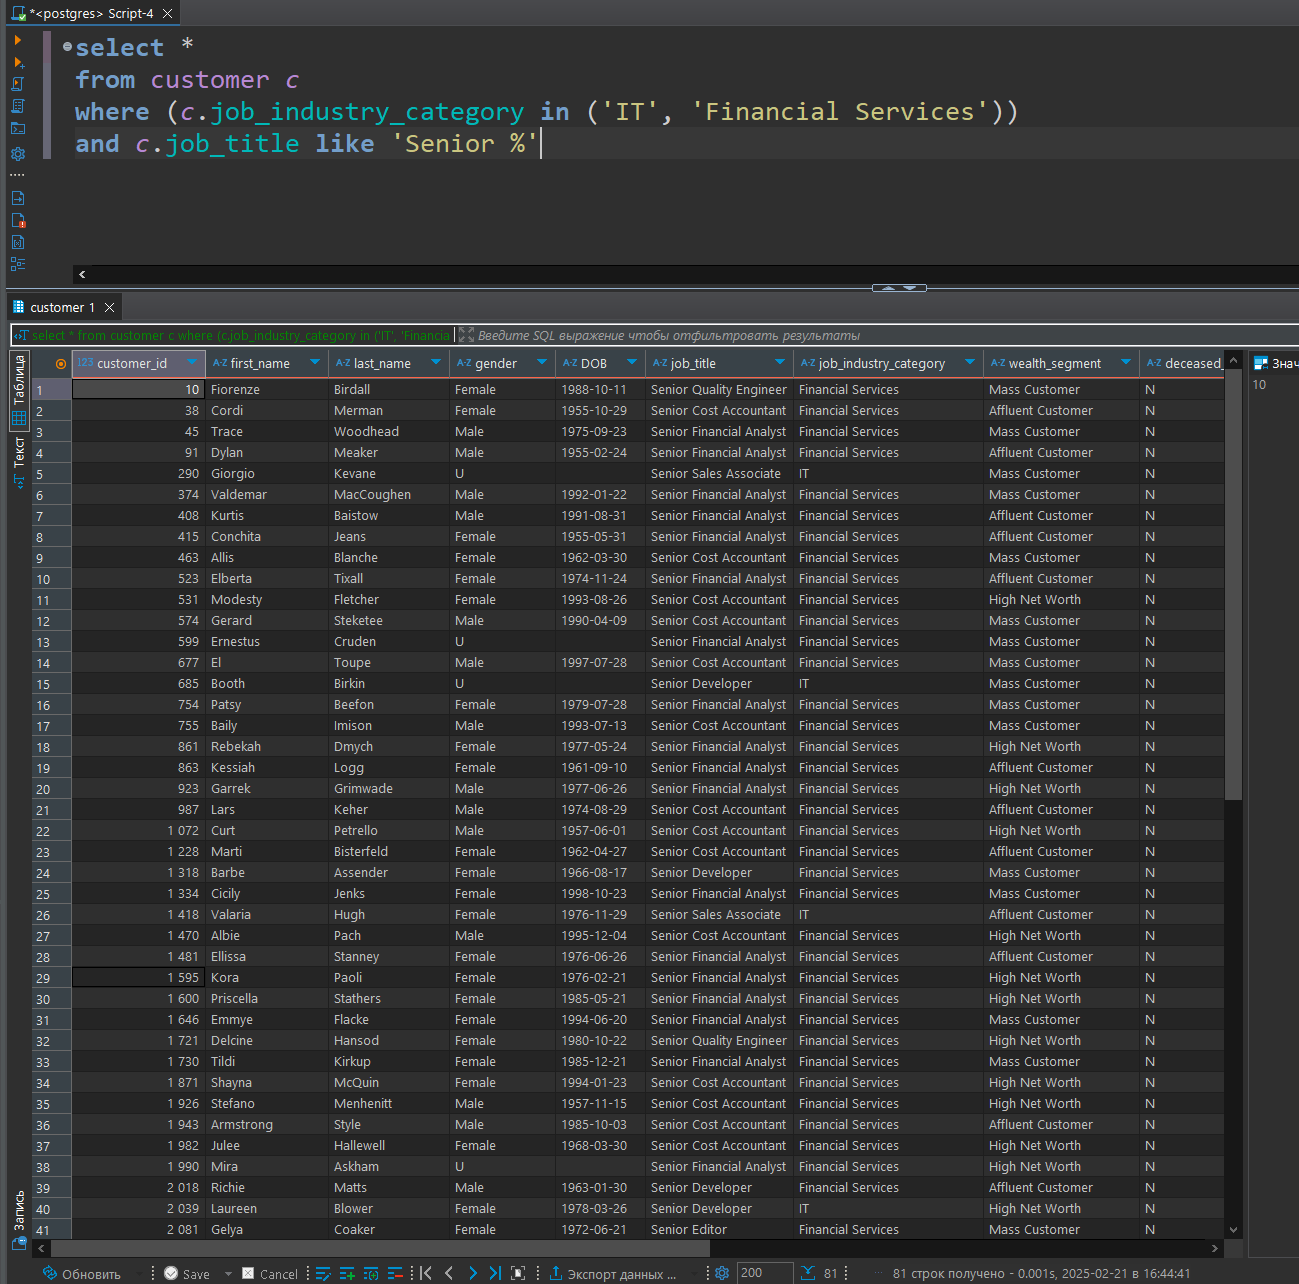

In [65]:
customer[
    ((customer['job_industry_category'] == 'IT') | (customer['job_industry_category'] == 'Financial Services')) &
    (customer['job_title'].str.split(' ').str[0] == "Senior")]

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
9,10,Fiorenze,Birdall,Female,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,44339 Golden Leaf Alley,4557,QLD,Australia,4
37,38,Cordi,Merman,Female,1955-10-29,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,1 Claremont Park,3931,VIC,Australia,10
44,45,Trace,Woodhead,Male,1975-09-23,Senior Financial Analyst,Financial Services,Mass Customer,N,No,3107 Calypso Terrace,2210,New South Wales,Australia,9
90,91,Dylan,Meaker,Male,1955-02-24,Senior Financial Analyst,Financial Services,Affluent Customer,N,Yes,72 Dorton Crossing,3133,VIC,Australia,10
289,290,Giorgio,Kevane,U,NaN,Senior Sales Associate,IT,Mass Customer,N,No,807 Beilfuss Crossing,3030,VIC,Australia,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3720,3721,Merrili,Potticary,Female,1994-10-13,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,6033 Blaine Court,2075,NSW,Australia,12
3767,3768,Christina,Grevatt,Female,1971-01-17,Senior Financial Analyst,Financial Services,Mass Customer,N,Yes,9932 Atwood Center,2011,NSW,Australia,10
3842,3843,Mahmoud,Ligerton,Male,1989-06-06,Senior Financial Analyst,Financial Services,Mass Customer,N,Yes,38473 Waubesa Alley,2759,NSW,Australia,8
3931,3932,Hadley,Veracruysse,Male,1986-07-10,Senior Editor,Financial Services,Mass Customer,N,No,67473 Nova Avenue,3089,VIC,Australia,10


(1 балл) Вывести все бренды, которые закупают клиенты, работающие в сфере Financial Services

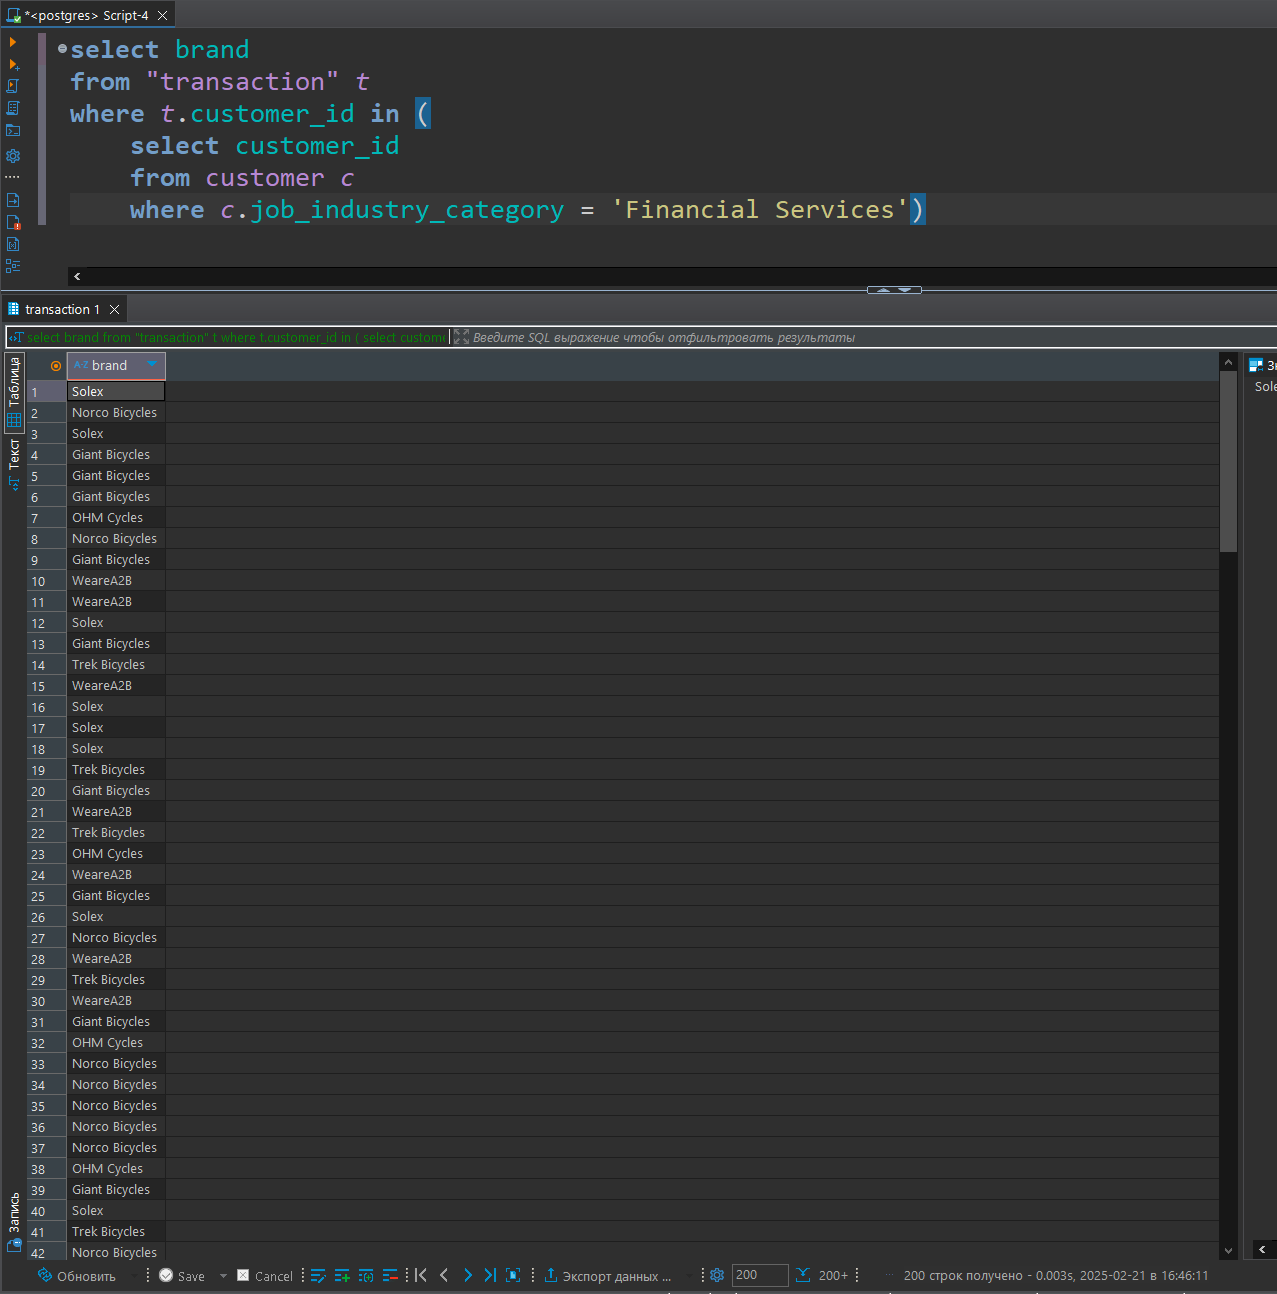

In [71]:
customer_id = customer[customer['job_industry_category'] == 'Financial Services']['customer_id']
transaction[transaction['customer_id'].isin(customer_id)]['brand']

,brand
0,Solex
3,Norco Bicycles
8,Solex
14,Giant Bicycles
17,Giant Bicycles
...,...
19978,Trek Bicycles
19985,Solex
19987,Norco Bicycles
19996,Solex


(1 балл) Вывести 10 клиентов, которые оформили онлайн-заказ продукции из брендов 'Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles'.

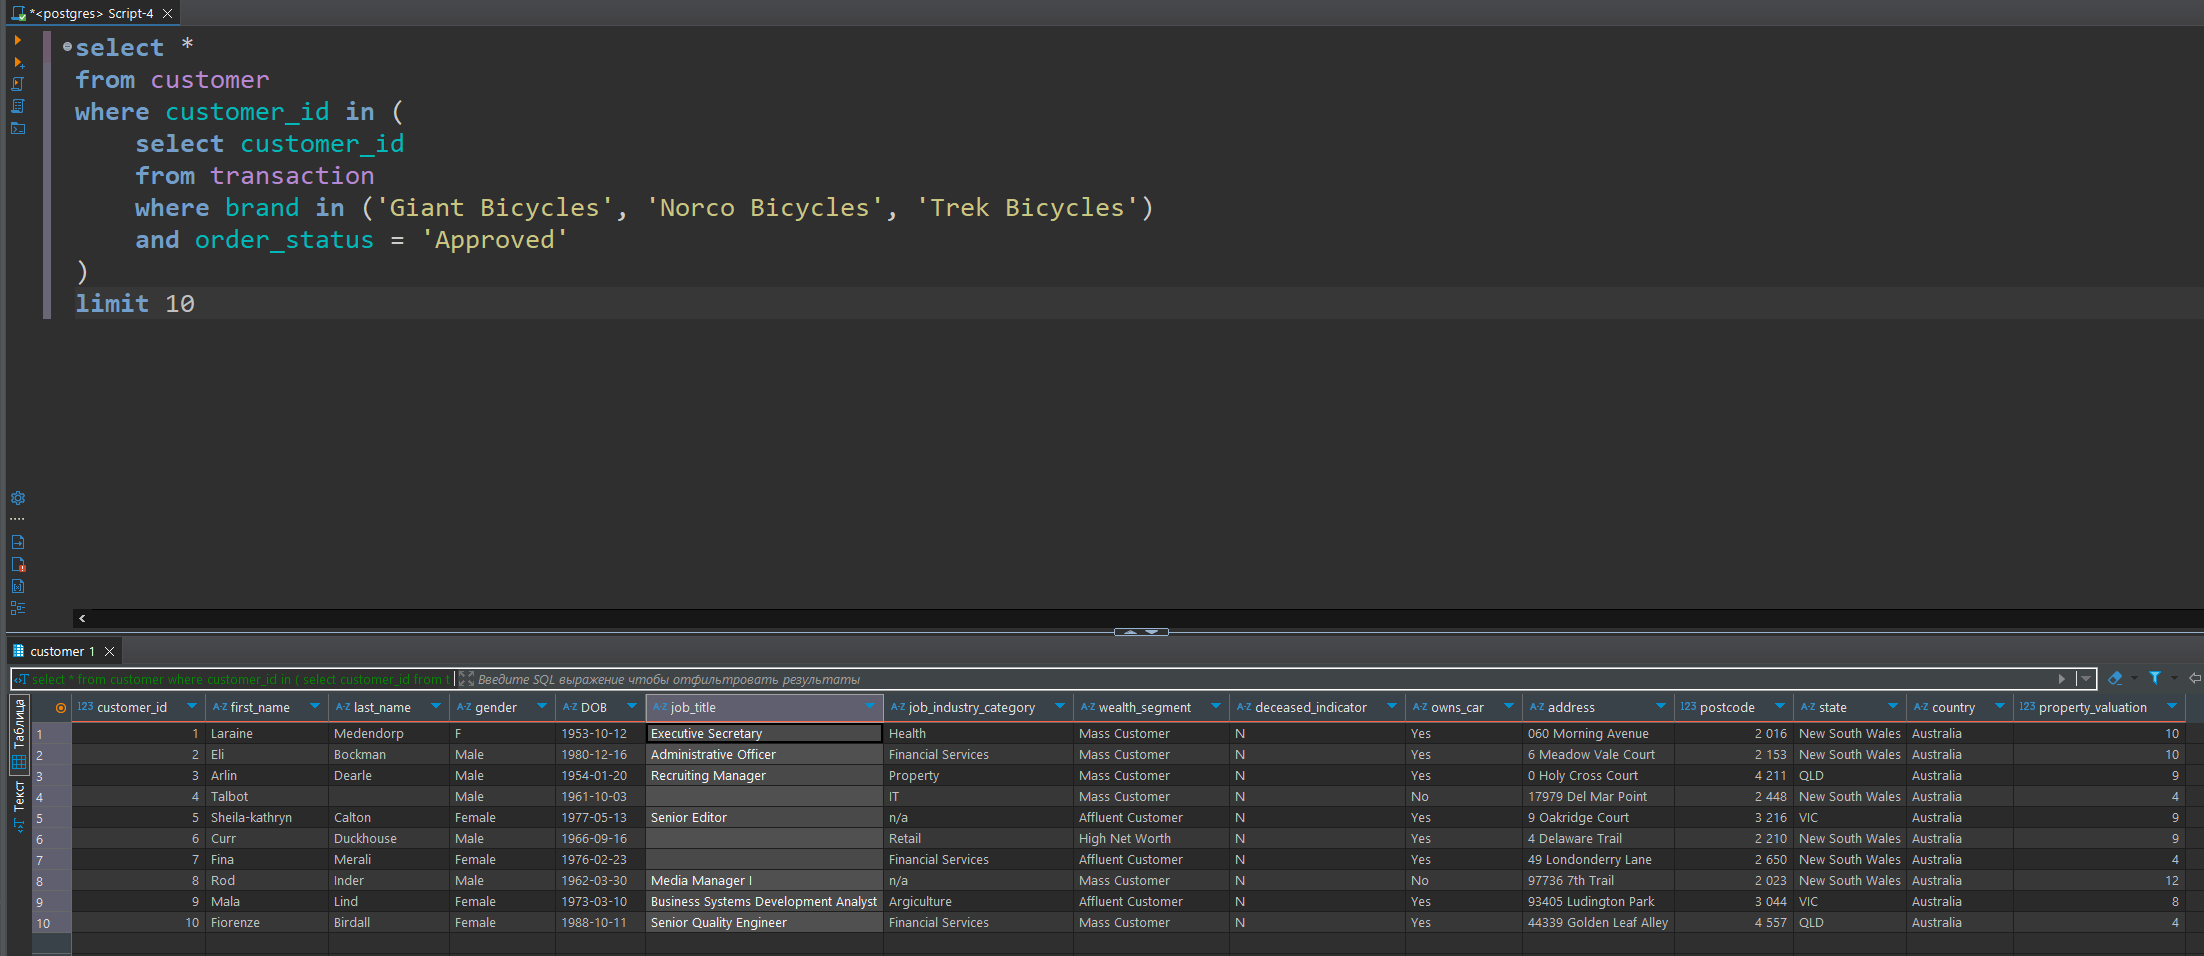

In [79]:
customer_id = transaction[
    (transaction['brand'].isin(['Giant Bicycles', 'Norco Bicycles', 'Trek Bicycles']) *
     transaction['order_status']=='Approved')]['customer_id']

In [80]:
customer[customer['customer_id'].isin(customer_id)].head(10)

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,F,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,Eli,Bockman,Male,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,3,Arlin,Dearle,Male,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,1961-10-03,NaN,IT,Mass Customer,N,No,17979 Del Mar Point,2448,New South Wales,Australia,4
4,5,Sheila-kathryn,Calton,Female,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,9 Oakridge Court,3216,VIC,Australia,9
5,6,Curr,Duckhouse,Male,1966-09-16,NaN,Retail,High Net Worth,N,Yes,4 Delaware Trail,2210,New South Wales,Australia,9
6,7,Fina,Merali,Female,1976-02-23,NaN,Financial Services,Affluent Customer,N,Yes,49 Londonderry Lane,2650,New South Wales,Australia,4
7,8,Rod,Inder,Male,1962-03-30,Media Manager I,NaN,Mass Customer,N,No,97736 7th Trail,2023,New South Wales,Australia,12
8,9,Mala,Lind,Female,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,93405 Ludington Park,3044,VIC,Australia,8
9,10,Fiorenze,Birdall,Female,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,44339 Golden Leaf Alley,4557,QLD,Australia,4


(1 балл) Вывести всех клиентов, у которых нет транзакций.

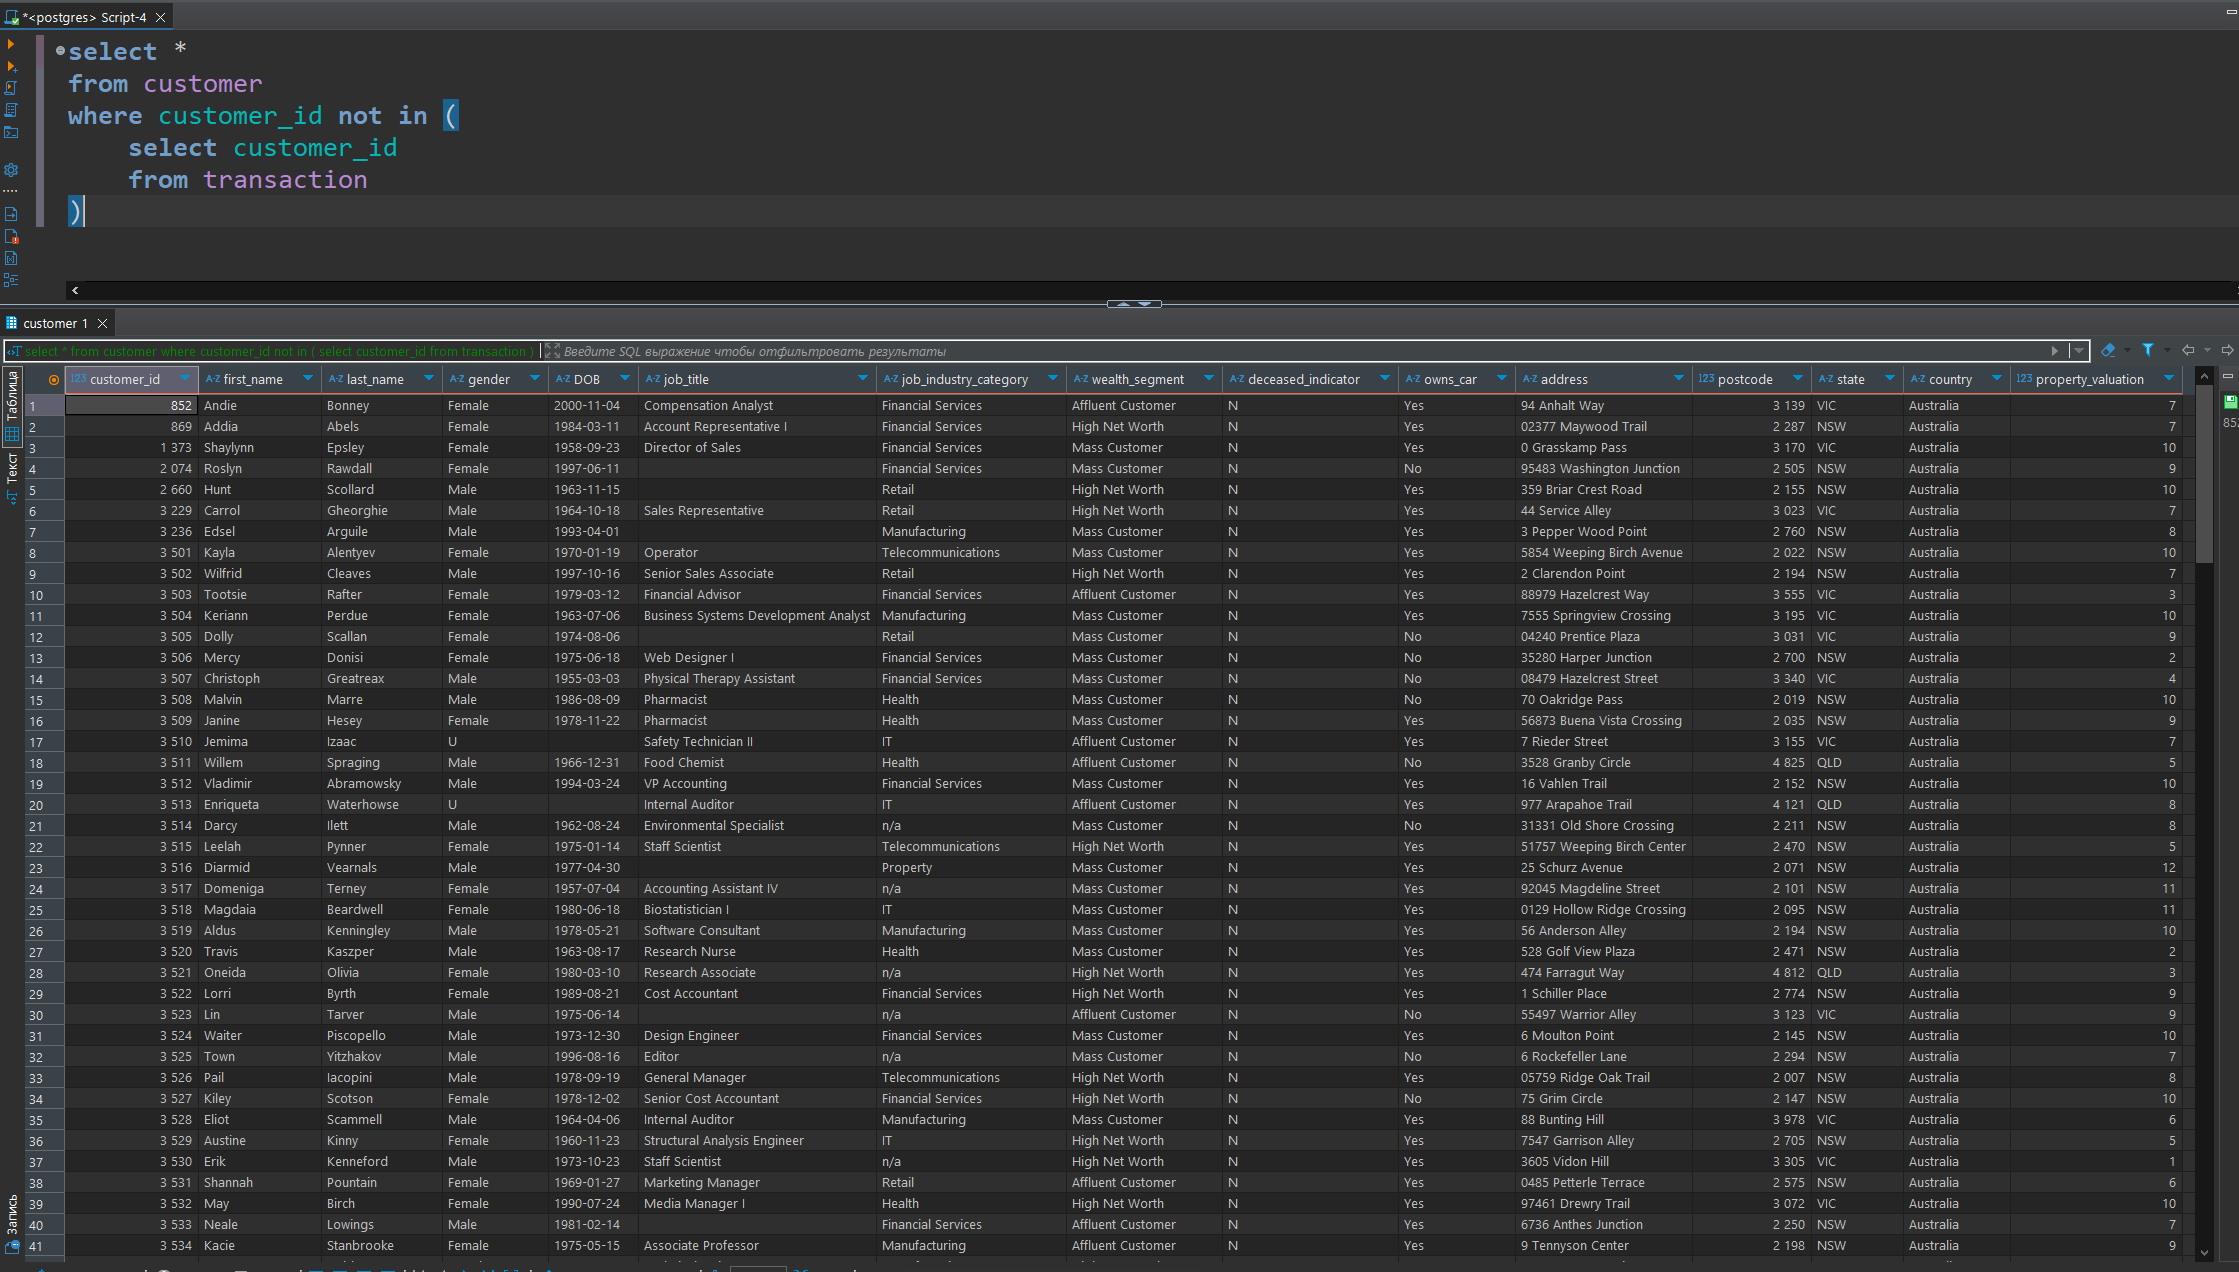

In [85]:
customer[~customer['customer_id'].isin(transaction['customer_id'])]

,customer_id,first_name,last_name,gender,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,address,postcode,state,country,property_valuation
851,852,Andie,Bonney,Female,2000-11-04,Compensation Analyst,Financial Services,Affluent Customer,N,Yes,94 Anhalt Way,3139,VIC,Australia,7
868,869,Addia,Abels,Female,1984-03-11,Account Representative I,Financial Services,High Net Worth,N,Yes,02377 Maywood Trail,2287,NSW,Australia,7
1372,1373,Shaylynn,Epsley,Female,1958-09-23,Director of Sales,Financial Services,Mass Customer,N,Yes,0 Grasskamp Pass,3170,VIC,Australia,10
2073,2074,Roslyn,Rawdall,Female,1997-06-11,NaN,Financial Services,Mass Customer,N,No,95483 Washington Junction,2505,NSW,Australia,9
2659,2660,Hunt,Scollard,Male,1963-11-15,NaN,Retail,High Net Worth,N,Yes,359 Briar Crest Road,2155,NSW,Australia,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,1975-08-09,VP Product Management,Health,Mass Customer,N,No,57042 Village Green Point,4511,QLD,Australia,6
3996,3997,Blanch,Nisuis,Female,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,3998,Sarene,Woolley,U,NaN,Assistant Manager,IT,High Net Worth,N,No,8194 Lien Street,4032,QLD,Australia,7
3998,3999,Patrizius,NaN,Male,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,320 Acker Drive,2251,NSW,Australia,7


(2 балла) Вывести всех клиентов из IT, у которых транзакции с максимальной стандартной стоимостью.

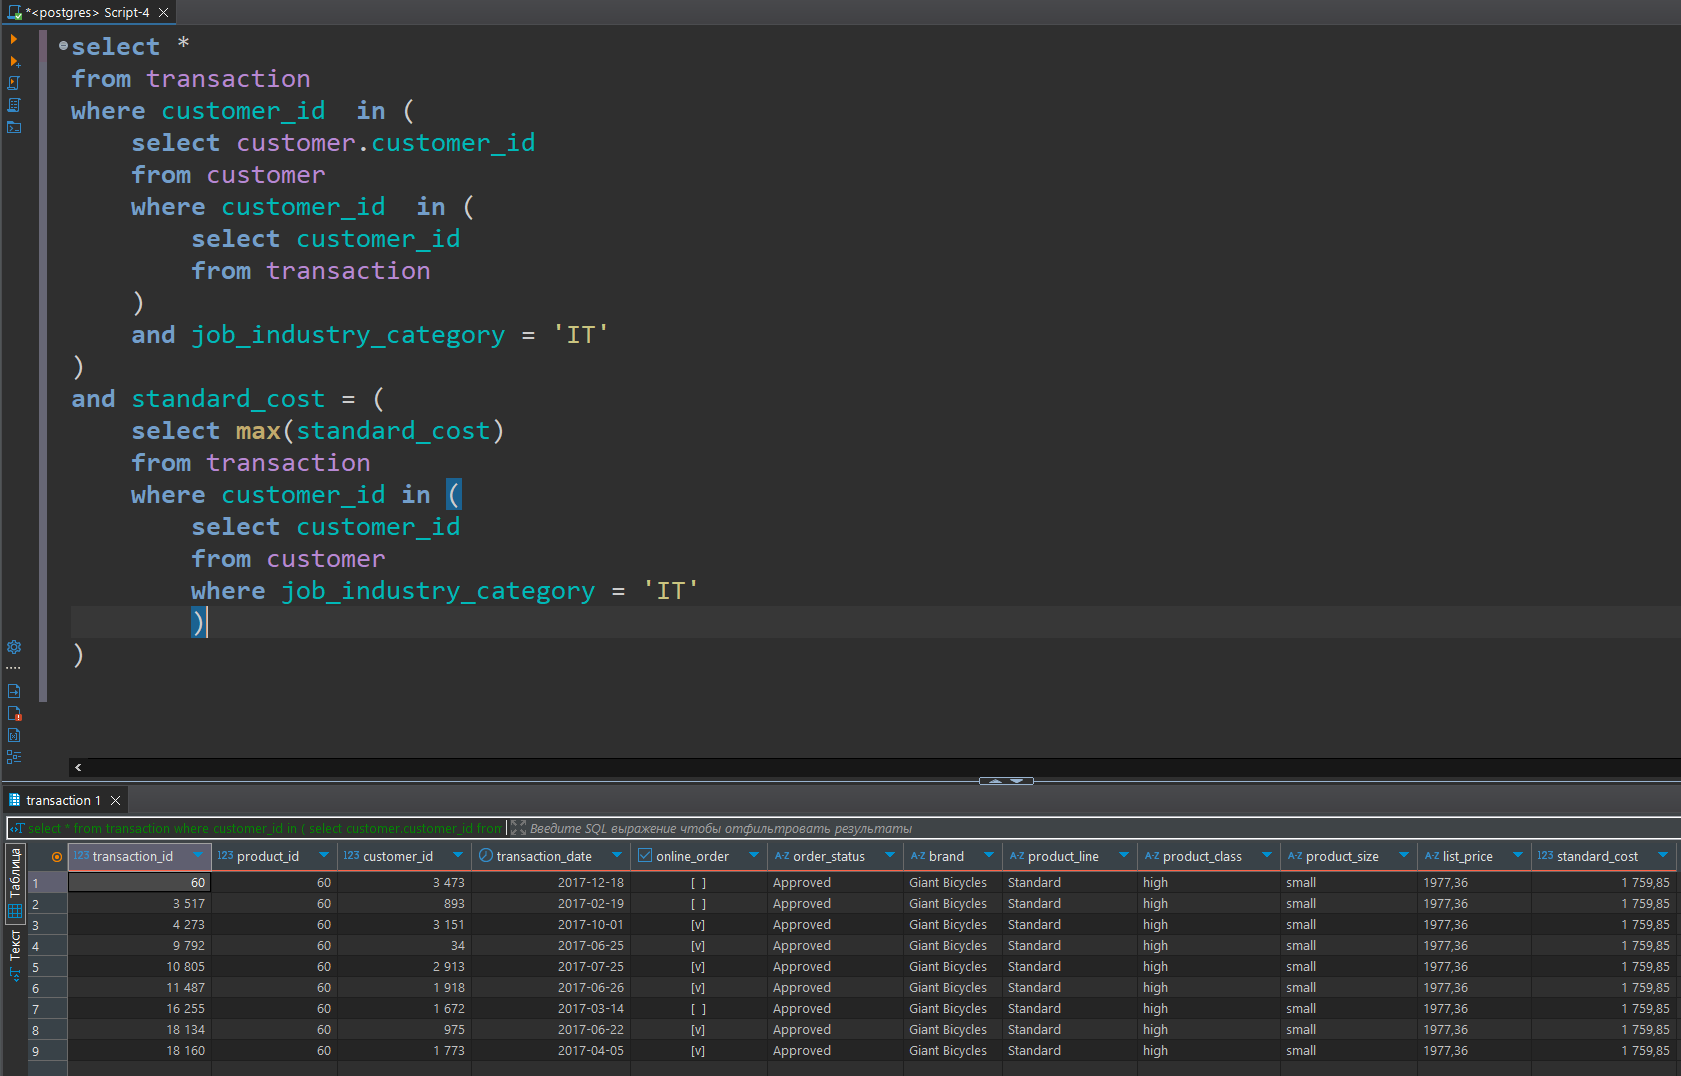

In [111]:
customer_id = customer[(customer['customer_id'].isin(transaction['customer_id'])) &
         (customer['job_industry_category'] == "IT")]['customer_id']

df = transaction[transaction['customer_id'].isin(customer_id)]
df[df['standard_cost'] == df['standard_cost'].max()]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
59,60,60,3473,2017-12-18,False,Approved,Giant Bicycles,Standard,high,small,"1977,36",1759.85
3516,3517,60,893,2017-02-19,False,Approved,Giant Bicycles,Standard,high,small,"1977,36",1759.85
4272,4273,60,3151,2017-10-01,True,Approved,Giant Bicycles,Standard,high,small,"1977,36",1759.85
9791,9792,60,34,2017-06-25,True,Approved,Giant Bicycles,Standard,high,small,"1977,36",1759.85
10804,10805,60,2913,2017-07-25,True,Approved,Giant Bicycles,Standard,high,small,"1977,36",1759.85
11486,11487,60,1918,2017-06-26,True,Approved,Giant Bicycles,Standard,high,small,"1977,36",1759.85
16254,16255,60,1672,2017-03-14,NaN,Approved,Giant Bicycles,Standard,high,small,"1977,36",1759.85
18133,18134,60,975,2017-06-22,True,Approved,Giant Bicycles,Standard,high,small,"1977,36",1759.85
18159,18160,60,1773,2017-04-05,True,Approved,Giant Bicycles,Standard,high,small,"1977,36",1759.85


(2 балла) Вывести всех клиентов из сферы IT и Health, у которых есть подтвержденные транзакции за период '2017-07-07' по '2017-07-17'.

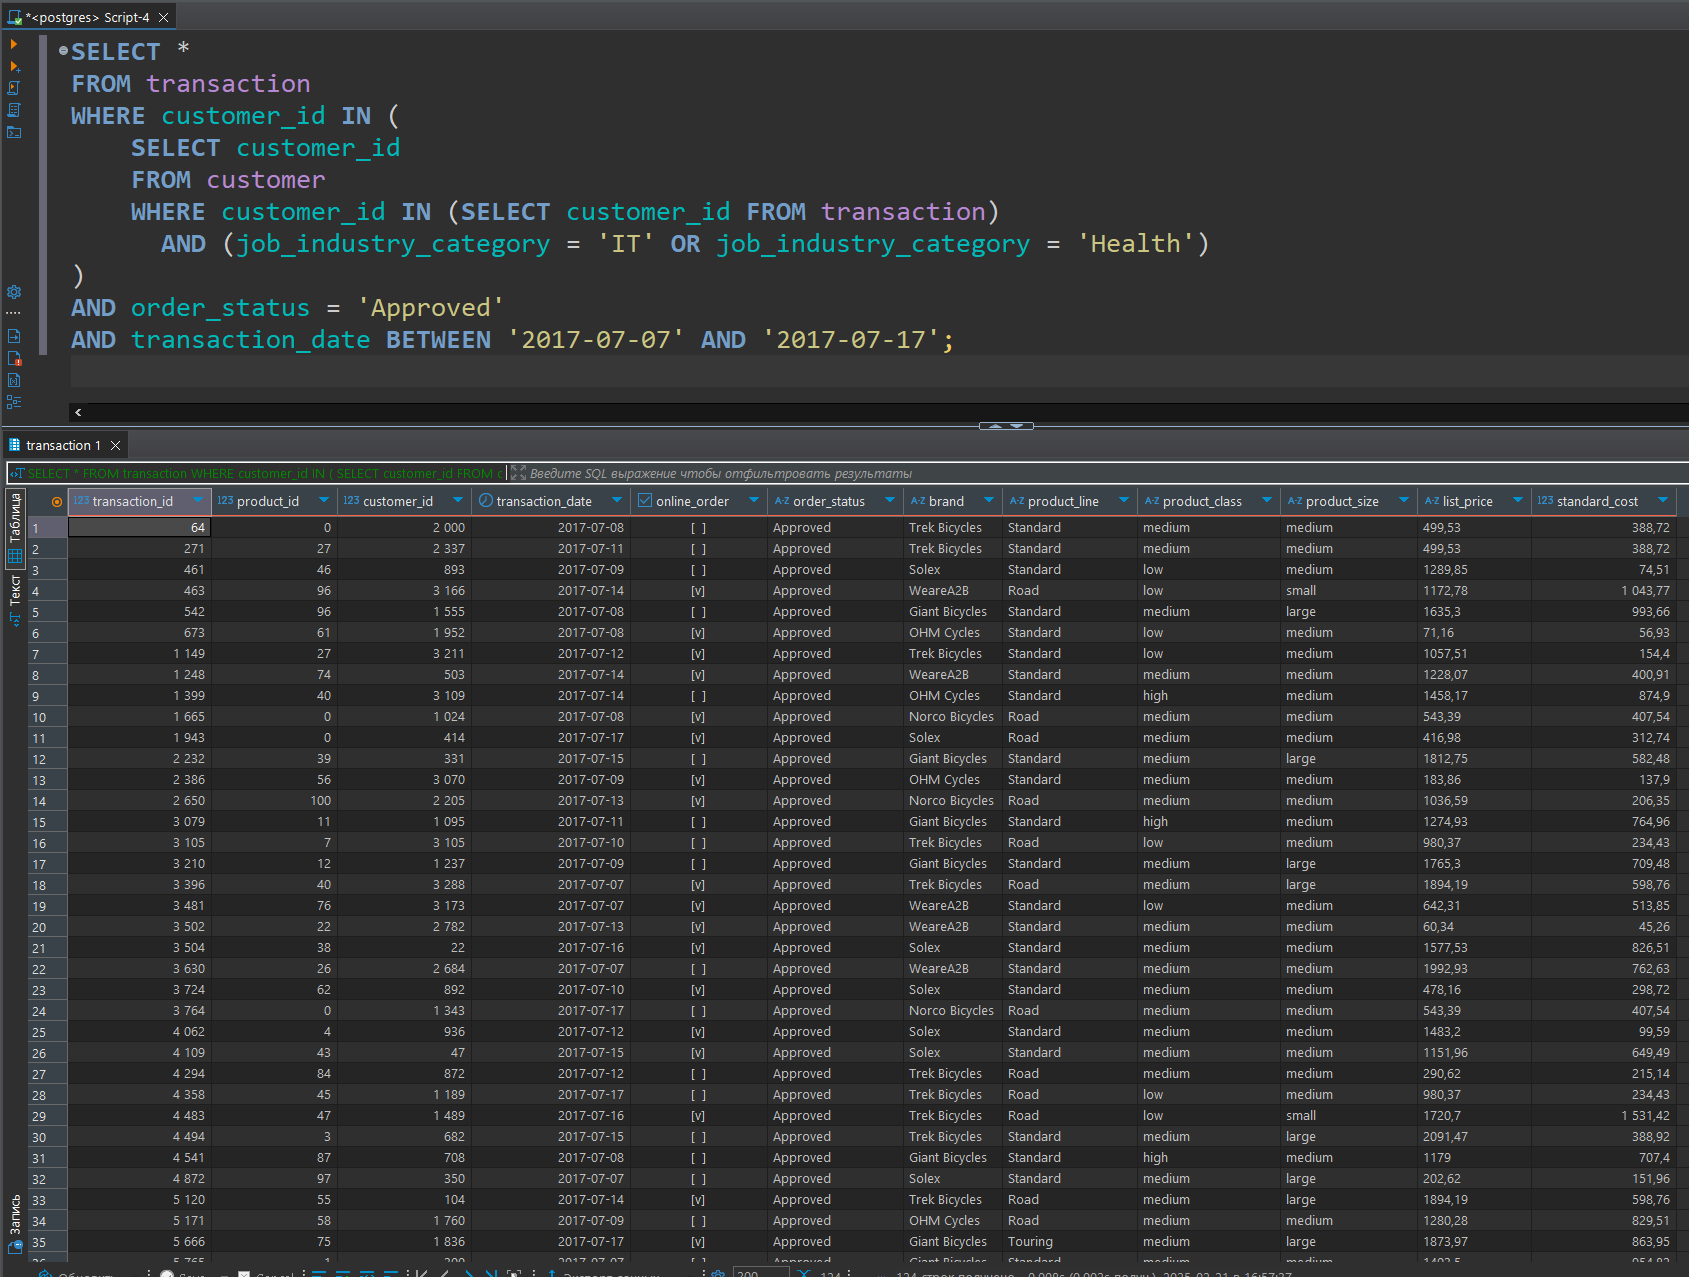

In [113]:
customer_id = customer[(customer['customer_id'].isin(transaction['customer_id'])) &
         ((customer['job_industry_category'] == "IT") | (customer['job_industry_category'] == "Health"))]['customer_id']


In [115]:
transaction[
    (transaction['customer_id'].isin(customer_id)) &
    (transaction['order_status'] == 'Approved') &
    (transaction["transaction_date"] >= "2017-07-07") &
     (transaction["transaction_date"] <= "2017-07-17")]

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost
63,64,0,2000,2017-07-08,False,Approved,Trek Bicycles,Standard,medium,medium,"499,53",388.72
270,271,27,2337,2017-07-11,False,Approved,Trek Bicycles,Standard,medium,medium,"499,53",388.72
460,461,46,893,2017-07-09,False,Approved,Solex,Standard,low,medium,"1289,85",74.51
462,463,96,3166,2017-07-14,True,Approved,WeareA2B,Road,low,small,"1172,78",1043.77
541,542,96,1555,2017-07-08,False,Approved,Giant Bicycles,Standard,medium,large,"1635,3",993.66
...,...,...,...,...,...,...,...,...,...,...,...,...
19319,19320,72,1174,2017-07-07,False,Approved,Norco Bicycles,Standard,medium,medium,"360,4",270.30
19528,19529,59,1044,2017-07-09,True,Approved,WeareA2B,Standard,medium,small,"1415,01",1259.36
19554,19555,0,1862,2017-07-11,True,Approved,Solex,Standard,medium,medium,"441,49",84.99
19633,19634,74,712,2017-07-15,False,Approved,WeareA2B,Standard,medium,medium,"1228,07",400.91
